In [1]:
import tensorflow
import cv2
import matplotlib.pyplot as plt


C:\Learning\DeepLearning\deeplearning\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
image_array = cv2.imread("laptop1.webp")
image_array.shape

(456, 474, 3)

In [3]:
image_array[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [253, 255, 253],
       [253, 255, 253],
       [253, 255, 253]], dtype=uint8)

In [4]:
gray_image_array = cv2.imread("laptop2.webp",cv2.IMREAD_GRAYSCALE)
gray_image_array.shape

(474, 474)

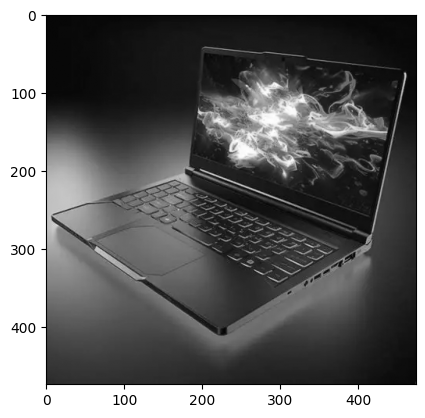

In [5]:
plt.imshow(gray_image_array,cmap= 'gray')

### Resize Image

150528


(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

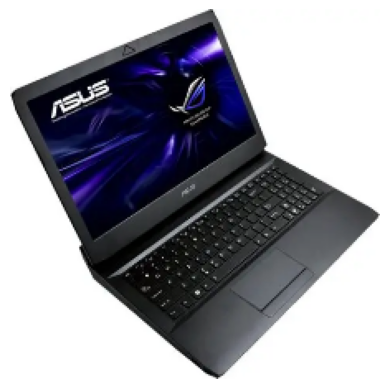

In [6]:
img = cv2.imread("laptop1.webp")
resize_image =cv2.resize(img,(224,224))
print(resize_image.size)
plt.imshow(resize_image)
plt.axis('off')

In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Flatten, Conv2D, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [17]:
image_size = (224,224)
data_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator = data_generator.flow_from_directory("../data/",target_size= image_size, batch_size=32,class_mode='binary',subset='training')
val_generator = data_generator.flow_from_directory("../data/",target_size= image_size, batch_size=32,class_mode='binary',subset='validation')
list(train_generator.class_indices.keys())

Found 322 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


['cat', 'dog']

### Model Building

In [3]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(3,3),activation='relu',input_shape= image_size+(3,) ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#  Dense Layer
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

### Model training

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =EarlyStopping(monitor='accuracy', patience=5, verbose=1)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,validation_data=val_generator,callbacks=early_stopping, epochs=50,verbose=2)

Epoch 1/50
11/11 - 50s - 5s/step - accuracy: 0.4814 - loss: 1.1196 - val_accuracy: 0.6000 - val_loss: 0.6901
Epoch 2/50
11/11 - 33s - 3s/step - accuracy: 0.4689 - loss: 0.6964 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 3/50
11/11 - 41s - 4s/step - accuracy: 0.5621 - loss: 0.6837 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 4/50
11/11 - 33s - 3s/step - accuracy: 0.5932 - loss: 0.6627 - val_accuracy: 0.5000 - val_loss: 0.7153
Epoch 5/50
11/11 - 42s - 4s/step - accuracy: 0.6335 - loss: 0.6226 - val_accuracy: 0.4875 - val_loss: 0.6951
Epoch 6/50
11/11 - 45s - 4s/step - accuracy: 0.7329 - loss: 0.5475 - val_accuracy: 0.5625 - val_loss: 0.7435
Epoch 7/50
11/11 - 73s - 7s/step - accuracy: 0.8323 - loss: 0.4264 - val_accuracy: 0.5375 - val_loss: 0.8599
Epoch 8/50
11/11 - 42s - 4s/step - accuracy: 0.8230 - loss: 0.3941 - val_accuracy: 0.6000 - val_loss: 0.8203
Epoch 9/50
11/11 - 34s - 3s/step - accuracy: 0.8447 - loss: 0.3261 - val_accuracy: 0.5250 - val_loss: 1.1472
Epoch 10/50
11/11 -

In [5]:
model.save('cnn_model.keras')